In [ ]:
!pip install netron

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
21/21 [==============================] - 6s 76ms/step - loss: 1.8124 - accuracy: 0.6656 - val_loss: 1.4176 - val_accuracy: 0.8261
Epoch 2/50
21/21 [==============================] - 1s 24ms/step - loss: 1.0809 - accuracy: 0.8718 - val_loss: 0.9458 - val_accuracy: 0.9130
Epoch 3/50
21/21 [==============================] - 1s 25ms/step - loss: 0.6808 - accuracy: 0.9496 - val_loss: 0.6850 - val_accuracy: 0.9565
Epoch 4/50
21/21 [==============================] - 1s 24ms/step - loss: 0.4611 - accuracy: 0.9847 - val_loss: 0.5115 - val_accuracy: 0.9457
Epoch 5/50
21/21 [==============================] - 0s 22ms/step - loss: 0.3337 - accuracy: 0.9908 - val_loss: 0.3938 - val_accuracy: 0.9565
Epoch 6/50
21/21 [==============================] - 0s 24ms/step - loss: 0.2333 - accuracy: 0.9924 - val_loss: 0.3128 - val_accuracy: 0.9783
Epoch 7/50
21/21 [=======

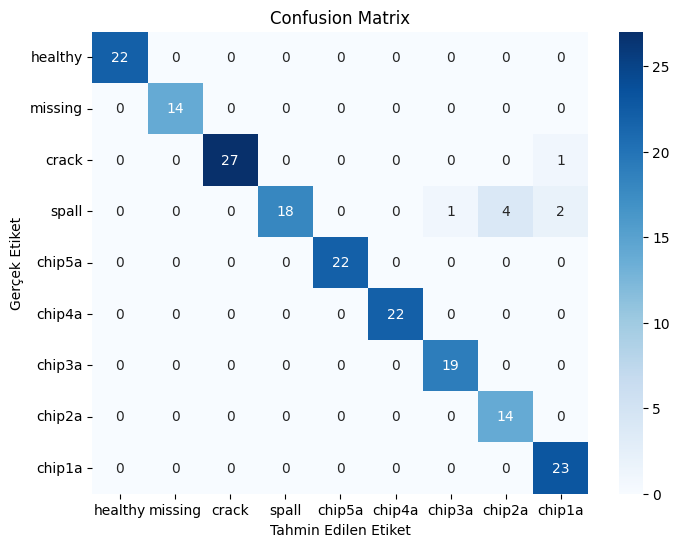

Model Doğruluğu: 0.9576719576719577


In [ ]:
# drive'a bağlanma
from google.colab import drive
drive.mount('/content/drive')

# Keras ve kütüphaneleri yükleme
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential, load_model  # load_model eklenmiş
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
import netron

# data loader
data_path = '/content/drive/MyDrive/data/'
time_domain_data = np.load(data_path + 'DataForClassification_TimeDomain.npy')

# Veriyi düzenleme
X = time_domain_data.T  # Veri boyutu (936x3600)
y = np.repeat(np.arange(9), 104)  # labelları oluşturma

# Veriyi train, validation ve test setlerine ayırma
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Veriyi LSTM modeline uygun hale getirme
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# labelları one-hot encoding yapma
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Modeli kaydetme
model.save(data_path + 'lstm_model')

# Netron ile modeli görselleştirme
netron.start(data_path + 'lstm_model')

# Modeli yükleme
loaded_model = load_model(data_path + 'lstm_model')

# test seti ile modeli değerlendirme
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# confusion matrix oluşturma
cm = confusion_matrix(y_true, y_pred_classes)

# accuracy değerini hesaplama
accuracy = accuracy_score(y_true, y_pred_classes)

# Confusion matrixini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['healthy','missing','crack','spall','chip5a','chip4a','chip3a','chip2a','chip1a'], yticklabels=['healthy','missing','crack','spall','chip5a','chip4a','chip3a','chip2a','chip1a'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

# Model doğruluğunu-accuracy yazdırma
print(f'Model Doğruluğu: {accuracy}')


In [ ]:
# Install Netron
!pip install netron

# Import Netron
import netron

# Specify the path to the saved model file
model_path = data_path + 'lstm_model'

# Start Netron
netron.start(model_path)



Serving '/content/drive/MyDrive/data/lstm_model' at http://localhost:18386


('localhost', 18386)